In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [2]:
def ser(a,b,c,d):
    n=0
    for i in range(len(a)):
        if(a[i]!=b[i] or c[i]!=d[i]):
            n=n+1
    return n 

In [3]:
nSym = 10**6
EbN0dBs = np.arange(start=-4,stop=9,step=1)
BER_sim = np.zeros(len(EbN0dBs))
SER_sim = np.zeros(len(EbN0dBs))
M=2
m = np.arange(0,M)
k = np.log2(4)
EsN0dB = 10*np.log10(k)+EbN0dBs

A = 1
constellation = -A*np.cos(m/M*2*np.pi)
print(constellation)

[-1.  1.]


[0 0 0 ... 0 0 1]
[0 0 1 ... 0 1 0]
[0 1 0 ... 1 0 1]
[-1.-1.j -1.+1.j  1.-1.j ... -1.+1.j  1.-1.j -1.+1.j]


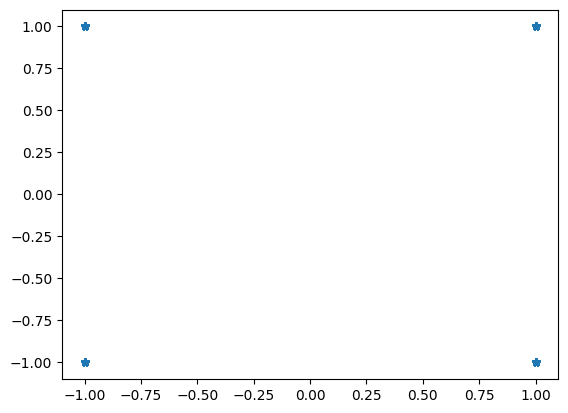

In [4]:
inputSyms =  np.random.randint(low = 0, high = M, size=nSym)
evendata =  inputSyms[0::2] 
odddata =  inputSyms[1::2]

print(inputSyms)
print (evendata)
print (odddata)

s_even = constellation[evendata] 
s_odd  = constellation[odddata]

s_qpsk = (s_even+1j*s_odd)
print(s_qpsk)
plt.plot(np.real(s_qpsk),np.imag(s_qpsk),'*')

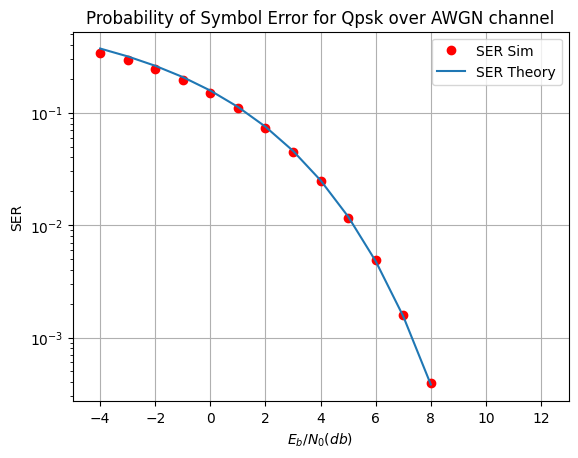

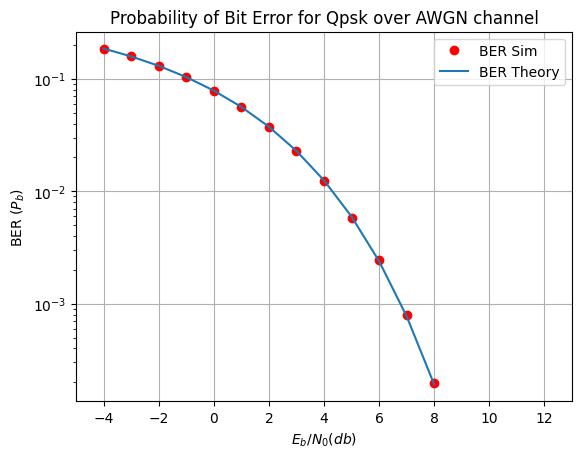

In [5]:
for i,EbN0 in enumerate(EsN0dB):
    gamma = 10**(EbN0/10)
    P = sum(abs(s_qpsk)**2)/len(s_qpsk)
    N0 = P/gamma
    n = np.sqrt(N0/2)*(np.random.standard_normal(s_qpsk.shape)+1j*np.random.standard_normal(s_qpsk.shape))
    r = s_qpsk+n

    detectedeven = (np.real(r) >= 0).astype(int)
    detectedodd = (np.imag(r) >= 0).astype(int)
    detected_sym = (2*detectedeven-1)+1j*(2*detectedodd-1)

    detectes_syms = np.zeros(len(inputSyms),dtype=int)
    detectes_syms[0::2] = detectedeven
    detectes_syms[1::2] = detectedodd

    BER_sim[i] = np.sum(detectes_syms != inputSyms)/nSym
    SER_sim[i] = 2*ser(detectedeven,evendata,detectedodd,odddata)/nSym

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
SER_theory = erfc(np.sqrt(10**(EbN0dBs/10)))
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.semilogy(EbN0dBs,SER_sim,color='r',marker='o',linestyle='',label='SER Sim')
ax.semilogy(EbN0dBs,SER_theory,marker='',linestyle='-',label='SER Theory')

ax.set_xlabel('$E_b/N_0(db)$')
ax.set_ylabel('SER')
ax.set_title('Probability of Symbol Error for Qpsk over AWGN channel')

ax.set_xlim(-5,13)
ax.grid(True)
ax.legend()
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BER Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BER Theory')

ax.set_xlabel('$E_b/N_0(db)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for Qpsk over AWGN channel')

ax.set_xlim(-5,13)
ax.grid(True)
ax.legend()
plt.show()

# fig,ax = plt.subplots(nrows=1,ncols=1)

